In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows' , 60)

In [4]:
df = pd.read_csv('municipality_bus_utilization.csv')
df.head(10)

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
5,2017-06-04 07:59:42,5,70,587
6,2017-06-04 07:59:42,2,273,697
7,2017-06-04 07:59:42,1,129,397
8,2017-06-04 07:59:42,6,597,3113
9,2017-06-04 07:59:42,3,623,1930


In [5]:
df.tail(10)

,timestamp,municipality_id,usage,total_capacity
13060,2017-08-19 16:30:35,4,2542,3893
13061,2017-08-19 16:30:35,1,396,397
13062,2017-08-19 16:30:35,0,1271,2813
13063,2017-08-19 16:30:35,9,815,1332
13064,2017-08-19 16:30:35,5,202,587
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113
13069,2017-08-19 16:30:35,3,1189,1930


In [6]:
df.shape

(13070, 4)

In [7]:
df['free_to_use'] = df['total_capacity'] - df['usage']
df

,timestamp,municipality_id,usage,total_capacity,free_to_use
0,2017-06-04 07:59:42,9,454,1332,878
1,2017-06-04 07:59:42,8,556,2947,2391
2,2017-06-04 07:59:42,4,1090,3893,2803
3,2017-06-04 07:59:42,0,204,2813,2609
4,2017-06-04 07:59:42,7,718,2019,1301
...,...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697,149
13066,2017-08-19 16:30:35,8,1193,2947,1754
13067,2017-08-19 16:30:35,7,1354,2019,665
13068,2017-08-19 16:30:35,6,1680,3113,1433


In [8]:
(df['free_to_use'] <= 0).sum()

241

In [9]:
(df['free_to_use'] < 0 ).sum()

229

In [10]:
df[df['free_to_use'] < 0 ]

,timestamp,municipality_id,usage,total_capacity,free_to_use
7618,2017-07-17 12:04:02,1,399,397,-2
7621,2017-07-17 12:31:03,1,401,397,-4
7635,2017-07-17 13:04:03,1,399,397,-2
7648,2017-07-17 13:31:03,1,403,397,-6
7659,2017-07-17 14:04:03,1,403,397,-6
...,...,...,...,...,...
13010,2017-08-19 14:03:31,1,408,397,-11
13026,2017-08-19 14:30:33,1,410,397,-13
13037,2017-08-19 15:03:34,1,408,397,-11
13048,2017-08-19 15:29:33,1,411,397,-14


In [11]:
df['free_to_use'].min()

-15

In [12]:
df[df['free_to_use'] < 0 ]['municipality_id'].value_counts() # All wrong data in same municipality. Or maybe municipality's total_capacity may be wrong. 
                                                             # Maybe everything is right, the municipality needs a bigger capacity

1    229
Name: municipality_id, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
 4   free_to_use      13070 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 510.7+ KB


In [14]:
df = df.sort_values('timestamp' , ascending=True)
df

,timestamp,municipality_id,usage,total_capacity,free_to_use
0,2017-06-04 07:59:42,9,454,1332,878
1,2017-06-04 07:59:42,8,556,2947,2391
2,2017-06-04 07:59:42,4,1090,3893,2803
3,2017-06-04 07:59:42,0,204,2813,2609
4,2017-06-04 07:59:42,7,718,2019,1301
...,...,...,...,...,...
13064,2017-08-19 16:30:35,5,202,587,385
13065,2017-08-19 16:30:35,2,548,697,149
13066,2017-08-19 16:30:35,8,1193,2947,1754
13067,2017-08-19 16:30:35,7,1354,2019,665


In [15]:
df['timestamp'].value_counts(dropna=False) # There may be 2 misspelled data

2017-06-04 07:59:42    10
2017-07-22 15:31:37    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
2017-07-23 14:30:43    10
                       ..
2017-08-19 16:30:35    10
2017-06-16 14:34:14     9
2017-08-11 08:25:43     9
2017-06-16 14:27:13     1
2017-08-11 08:19:39     1
Name: timestamp, Length: 1309, dtype: int64

In [16]:
df[df['timestamp'] == '2017-06-16 14:27:13']

,timestamp,municipality_id,usage,total_capacity,free_to_use
2290,2017-06-16 14:27:13,5,189,587,398


In [17]:
df[df['timestamp'] == '2017-06-16 14:34:14']

,timestamp,municipality_id,usage,total_capacity,free_to_use
2299,2017-06-16 14:34:14,8,877,2947,2070
2298,2017-06-16 14:34:14,6,983,3113,2130
2297,2017-06-16 14:34:14,2,549,697,148
2296,2017-06-16 14:34:14,0,497,2813,2316
2294,2017-06-16 14:34:14,1,338,397,59
2293,2017-06-16 14:34:14,7,1294,2019,725
2292,2017-06-16 14:34:14,3,803,1930,1127
2291,2017-06-16 14:34:14,4,1348,3893,2545
2295,2017-06-16 14:34:14,9,754,1332,578


In [18]:
df[df['timestamp'] == '2017-08-11 08:19:39']

,timestamp,municipality_id,usage,total_capacity,free_to_use
11480,2017-08-11 08:19:39,3,313,1930,1617


In [19]:
df[df['timestamp'] == '2017-08-11 08:25:43']

,timestamp,municipality_id,usage,total_capacity,free_to_use
11487,2017-08-11 08:25:43,0,344,2813,2469
11489,2017-08-11 08:25:43,1,132,397,265
11488,2017-08-11 08:25:43,6,808,3113,2305
11486,2017-08-11 08:25:43,2,369,697,328
11484,2017-08-11 08:25:43,9,379,1332,953
11483,2017-08-11 08:25:43,5,11,587,576
11482,2017-08-11 08:25:43,8,450,2947,2497
11481,2017-08-11 08:25:43,4,782,3893,3111
11485,2017-08-11 08:25:43,7,739,2019,1280


In [20]:
# df[df['timestamp'] == '2017-06-16 14:27:13']['timestamp'] = '2017-06-16 14:34:14'

In [21]:
df.loc[df['timestamp'] == '2017-06-16 14:27:13', 'timestamp'] = '2017-06-16 14:34:14'
df.loc[df['timestamp'] == '2017-08-11 08:19:39', 'timestamp'] = '2017-08-11 08:25:43' # Yes, it was a typo and it has been corrected.

In [22]:
df['timestamp'].value_counts(dropna=False)

2017-06-04 07:59:42    10
2017-07-22 15:57:37    10
2017-07-23 16:04:46    10
2017-07-23 15:31:42    10
2017-07-23 15:04:43    10
                       ..
2017-06-30 08:26:02    10
2017-06-30 08:25:53    10
2017-06-30 08:00:03    10
2017-06-30 07:59:55    10
2017-08-19 16:30:35    10
Name: timestamp, Length: 1307, dtype: int64

In [23]:
df['municipality_id'].value_counts(dropna=False)

9    1307
8    1307
4    1307
0    1307
7    1307
5    1307
2    1307
1    1307
6    1307
3    1307
Name: municipality_id, dtype: int64

In [24]:
df['total_capacity'].value_counts(dropna=False)

1332    1307
2947    1307
3893    1307
2813    1307
2019    1307
587     1307
697     1307
397     1307
3113    1307
1930    1307
Name: total_capacity, dtype: int64

In [25]:
df['usage'].value_counts(dropna=False)

411     69
354     62
399     31
410     28
623     27
        ..
3376     1
3318     1
3238     1
2372     1
2542     1
Name: usage, Length: 2346, dtype: int64

In [26]:
df['timestamp'] = df['timestamp'].astype('datetime64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13070 entries, 0 to 13069
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        13070 non-null  datetime64[ns]
 1   municipality_id  13070 non-null  int64         
 2   usage            13070 non-null  int64         
 3   total_capacity   13070 non-null  int64         
 4   free_to_use      13070 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 612.7 KB


In [28]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].minute == 0 :
#         print(i)


# # Indexes with timestamps at 0 minutes 
# # 3400 to 12659

In [29]:
df.iloc[3400,:]

timestamp          2017-06-24 16:00:04
municipality_id                      2
usage                              459
total_capacity                     697
free_to_use                        238
Name: 3409, dtype: object

In [30]:
df.iloc[12659,:]

timestamp          2017-08-17 14:00:17
municipality_id                      9
usage                              970
total_capacity                    1332
free_to_use                        362
Name: 12654, dtype: object

In [31]:
df.iloc[13039,:]

timestamp          2017-08-19 15:03:34
municipality_id                      7
usage                             1618
total_capacity                    2019
free_to_use                        401
Name: 13033, dtype: object

In [32]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].hour == 7 :
#         print(i)

In [33]:
df['timestamp'][0]

Timestamp('2017-06-04 07:59:42')

In [34]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [35]:
df['hour'].value_counts(sort=True)

13    1520
9     1490
11    1460
8     1450
14    1450
15    1450
12    1420
10    1410
16    1160
7      260
Name: hour, dtype: int64

In [36]:
df['timestamp'] = df['timestamp'] + pd.Timedelta(minutes=5 , seconds=10) 
# By adding 5 minutes and 10 seconds, I included the border measurements in the next hours. In this way, I achieved a more uniform distribution.

In [37]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [38]:
df['hour'].value_counts() # Almost perfect now 

10    1460
12    1460
14    1460
15    1460
9     1450
11    1450
13    1450
8     1440
16    1440
Name: hour, dtype: int64

In [39]:
df

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...,...
13064,2017-08-19 16:35:45,5,202,587,385,8,19,16,35
13065,2017-08-19 16:35:45,2,548,697,149,8,19,16,35
13066,2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35
13067,2017-08-19 16:35:45,7,1354,2019,665,8,19,16,35


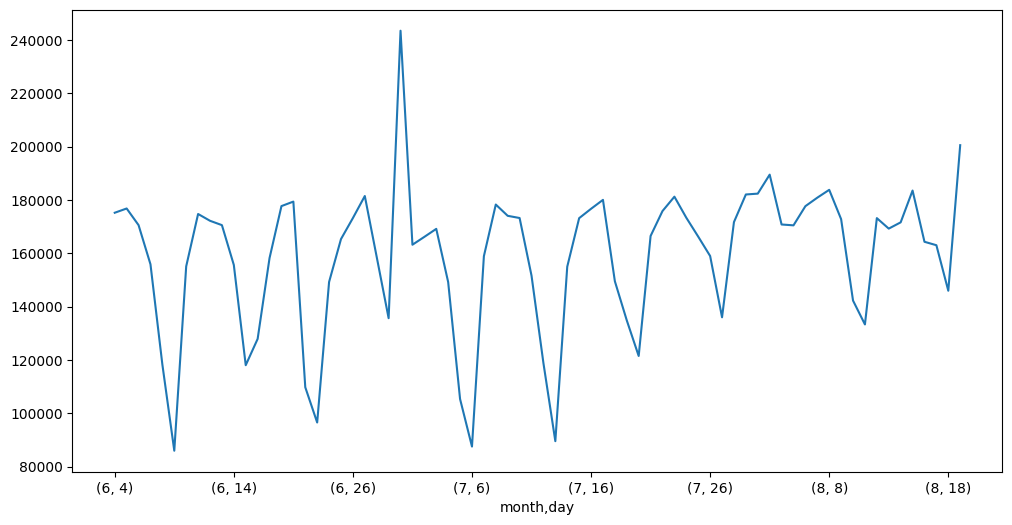

In [40]:
plt.figure(figsize=(12,6))

df.groupby(["month","day"])["usage"].sum().plot();

In [41]:
for x in [6,7,8]:
    for y in range(1,31):
        if df[(df['month'] == x) & (df['day'] == y)]['usage'].sum() <= 0 :
            print(f'{x}.Month {y}.day nan') # We have 4 nan days. ### 6-20 , 6-21 , 8-3 , 8-4

6.Month 1.day nan
6.Month 2.day nan
6.Month 3.day nan
6.Month 20.day nan
6.Month 21.day nan
8.Month 3.day nan
8.Month 4.day nan
8.Month 20.day nan
8.Month 21.day nan
8.Month 22.day nan
8.Month 23.day nan
8.Month 24.day nan
8.Month 25.day nan
8.Month 26.day nan
8.Month 27.day nan
8.Month 28.day nan
8.Month 29.day nan
8.Month 30.day nan


In [42]:
df[(df['month'] == 6) & (df['day'] == 1)]['usage'].sum() # One of the nan days

0

In [43]:
df[(df['month'] == 6) & (df['day'] == 30)]['usage'].sum() # The day have max usages.

243461

In [44]:
df[(df['month'] == 6) & (df['day'] == 30)] # 340 data ??? It should have been 170 or 180

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4316,2017-06-30 08:05:05,1,79,397,318,6,30,8,5
4318,2017-06-30 08:05:05,4,535,3893,3358,6,30,8,5
4319,2017-06-30 08:05:05,5,52,587,535,6,30,8,5
4315,2017-06-30 08:05:05,7,733,2019,1286,6,30,8,5
4317,2017-06-30 08:05:05,8,454,2947,2493,6,30,8,5
...,...,...,...,...,...,...,...,...,...
4644,2017-06-30 16:31:16,2,475,697,222,6,30,16,31
4642,2017-06-30 16:31:16,6,892,3113,2221,6,30,16,31
4641,2017-06-30 16:31:16,7,986,2019,1033,6,30,16,31
4640,2017-06-30 16:31:16,9,520,1332,812,6,30,16,31


In [45]:
df.groupby(['month','day']).count() # We have 72 days at total.(4 of them nan)

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
...              ...              ...    ...             ...          ...   
8     15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         180              180    180             180          180   
      19         180              180    180             180          180   

           hour  min  
month day             
6     4     180  180  
      5     180  180  
      6     180  180  
      7     180  180  
      8     180  180  
...         ...  ...  
8     15    180  180  
      16    180  180  
      17    180  180  
      18    180  180  
      19    180  180  

[72 rows x 7 columns]

In [46]:
df.groupby(['month','day']).count()['timestamp'].unique() # All of them should have been 180 or 170. Date with 340 data probably doubled

array([180, 170, 340], dtype=int64)

In [47]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 180]

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     4          180              180    180             180          180   
      5          180              180    180             180          180   
      6          180              180    180             180          180   
      7          180              180    180             180          180   
      8          180              180    180             180          180   
...              ...              ...    ...             ...          ...   
8     15         180              180    180             180          180   
      16         180              180    180             180          180   
      17         180              180    180             180          180   
      18         180              180    180             180          180   
      19         180              180    180             180          180   

           hour  min  
month day             
6     4     180  180  
      5     180  180  
      6     180  180  
      7     180  180  
      8     180  180  
...         ...  ...  
8     15    180  180  
      16    180  180  
      17    180  180  
      18    180  180  
      19    180  180  

[66 rows x 7 columns]

In [48]:
df[(df['month'] == 6) & (df['day'] == 4)].head(50) # An example of the day with 180 data

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
5,2017-06-04 08:04:52,5,70,587,517,6,4,8,4
6,2017-06-04 08:04:52,2,273,697,424,6,4,8,4
7,2017-06-04 08:04:52,1,129,397,268,6,4,8,4
8,2017-06-04 08:04:52,6,597,3113,2516,6,4,8,4
9,2017-06-04 08:04:52,3,623,1930,1307,6,4,8,4


In [49]:
df[(df['month'] == 6) & (df['day'] == 28)].head(50) # An example of the day with 170 data

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
3966,2017-06-28 08:21:51,0,194,2813,2619,6,28,8,21
3968,2017-06-28 08:21:51,5,66,587,521,6,28,8,21
3967,2017-06-28 08:21:51,1,94,397,303,6,28,8,21
3965,2017-06-28 08:21:51,7,733,2019,1286,6,28,8,21
3969,2017-06-28 08:21:51,6,734,3113,2379,6,28,8,21
3963,2017-06-28 08:21:51,4,1175,3893,2718,6,28,8,21
3962,2017-06-28 08:21:51,8,593,2947,2354,6,28,8,21
3961,2017-06-28 08:21:51,2,357,697,340,6,28,8,21
3960,2017-06-28 08:21:51,3,568,1930,1362,6,28,8,21
3964,2017-06-28 08:21:51,9,385,1332,947,6,28,8,21


In [50]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 170]

timestamp  municipality_id  usage  total_capacity  free_to_use  \
month day                                                                   
6     28         170              170    170             170          170   
7     18         170              170    170             170          170   
      25         170              170    170             170          170   
8     13         170              170    170             170          170   
      14         170              170    170             170          170   

           hour  min  
month day             
6     28    170  170  
7     18    170  170  
      25    170  170  
8     13    170  170  
      14    170  170

In [51]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 340] # But the reason why it is 340 instead of 170 should be investigated
                                                                                             # Bus services may have been doubled as it coincided with the middle of summer.
                                                                                             # But still, it is wrong to keep records 2 times in a row. We have to drop one of these 2 data

,,timestamp,municipality_id,usage,total_capacity,free_to_use,hour,min
month,day,,,,,,,
6,30,340,340,340,340,340,340,340


In [52]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # It seems clear that 2 measurements were made on the 30th day of June, with an interval of less than 1 minute in a row.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4316,2017-06-30 08:05:05,1,79,397,318,6,30,8,5
4318,2017-06-30 08:05:05,4,535,3893,3358,6,30,8,5
4319,2017-06-30 08:05:05,5,52,587,535,6,30,8,5
4315,2017-06-30 08:05:05,7,733,2019,1286,6,30,8,5
4317,2017-06-30 08:05:05,8,454,2947,2493,6,30,8,5
4313,2017-06-30 08:05:05,2,346,697,351,6,30,8,5
4312,2017-06-30 08:05:05,3,284,1930,1646,6,30,8,5
4311,2017-06-30 08:05:05,0,90,2813,2723,6,30,8,5
4310,2017-06-30 08:05:05,9,396,1332,936,6,30,8,5
4314,2017-06-30 08:05:05,6,666,3113,2447,6,30,8,5


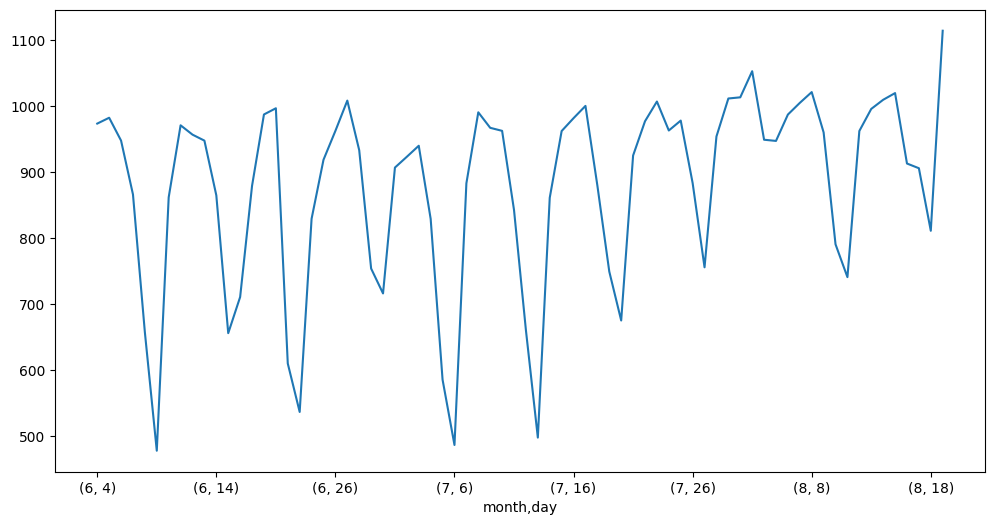

In [53]:
plt.figure(figsize=(12,6))

df.groupby(["month","day"])["usage"].mean().plot();

In [54]:
df[(df['month'] == 6) & (df['day'] == 30)]['timestamp'].unique()

array(['2017-06-30T08:05:05.000000000', '2017-06-30T08:05:13.000000000',
       '2017-06-30T08:31:03.000000000', '2017-06-30T08:31:12.000000000',
       '2017-06-30T09:05:02.000000000', '2017-06-30T09:05:10.000000000',
       '2017-06-30T09:31:07.000000000', '2017-06-30T09:31:13.000000000',
       '2017-06-30T10:05:02.000000000', '2017-06-30T10:05:15.000000000',
       '2017-06-30T10:31:04.000000000', '2017-06-30T10:31:12.000000000',
       '2017-06-30T11:05:06.000000000', '2017-06-30T11:05:12.000000000',
       '2017-06-30T11:31:05.000000000', '2017-06-30T11:31:14.000000000',
       '2017-06-30T12:05:08.000000000', '2017-06-30T12:05:14.000000000',
       '2017-06-30T12:31:16.000000000', '2017-06-30T12:32:04.000000000',
       '2017-06-30T13:05:16.000000000', '2017-06-30T13:12:09.000000000',
       '2017-06-30T13:31:09.000000000', '2017-06-30T13:31:11.000000000',
       '2017-06-30T14:04:57.000000000', '2017-06-30T14:05:09.000000000',
       '2017-06-30T14:31:15.000000000', '2017-06-30

In [55]:
drop_stamptimes = df[(df['month'] == 6) & (df['day'] == 30)]['timestamp'].unique()[[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]]
drop_stamptimes

array(['2017-06-30T08:05:05.000000000', '2017-06-30T08:31:03.000000000',
       '2017-06-30T09:05:02.000000000', '2017-06-30T09:31:07.000000000',
       '2017-06-30T10:05:02.000000000', '2017-06-30T10:31:04.000000000',
       '2017-06-30T11:05:06.000000000', '2017-06-30T11:31:05.000000000',
       '2017-06-30T12:05:08.000000000', '2017-06-30T12:31:16.000000000',
       '2017-06-30T13:05:16.000000000', '2017-06-30T13:31:09.000000000',
       '2017-06-30T14:04:57.000000000', '2017-06-30T14:31:15.000000000',
       '2017-06-30T15:05:10.000000000', '2017-06-30T15:32:14.000000000',
       '2017-06-30T16:05:17.000000000'], dtype='datetime64[ns]')

In [56]:
drop_indexes = df[df['timestamp'].isin(drop_stamptimes)].index
drop_indexes

Int64Index([4316, 4318, 4319, 4315, 4317, 4313, 4312, 4311, 4310, 4314,
            ...
            4639, 4638, 4636, 4635, 4637, 4633, 4632, 4631, 4630, 4634],
           dtype='int64', length=170)

In [57]:
df.drop(drop_indexes , axis = 0 , inplace = True)

In [58]:
df.reset_index(drop=True)

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
0,2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
1,2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2,2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
3,2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
4,2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...,...
12895,2017-08-19 16:35:45,5,202,587,385,8,19,16,35
12896,2017-08-19 16:35:45,2,548,697,149,8,19,16,35
12897,2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35
12898,2017-08-19 16:35:45,7,1354,2019,665,8,19,16,35


In [59]:
df.groupby(['month','day']).count()['timestamp'].unique()

array([180, 170], dtype=int64)

In [60]:
df['hour'].value_counts() # Still perfect, nice !

10    1440
12    1440
14    1440
15    1440
9     1430
11    1430
13    1430
16    1430
8     1420
Name: hour, dtype: int64

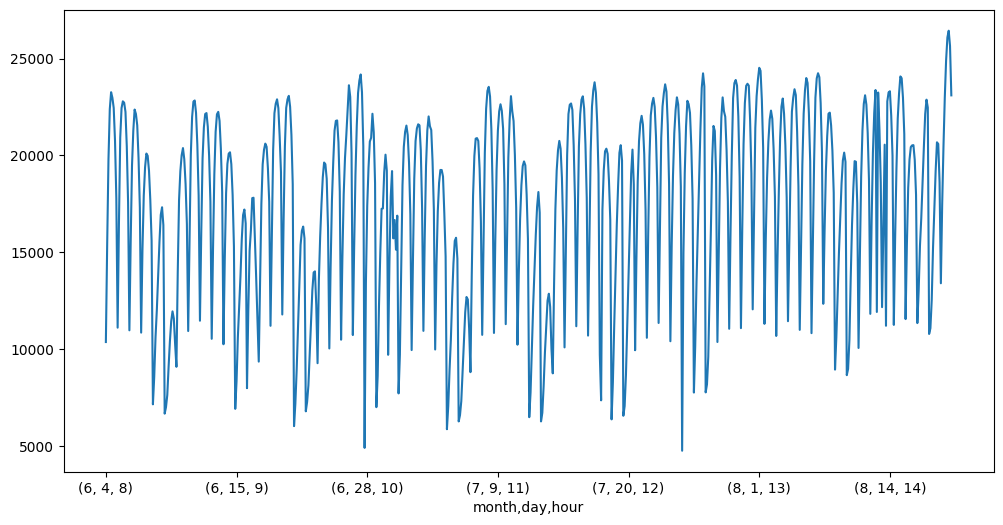

In [61]:
plt.figure(figsize=(12,6))

df.groupby(["month","day",'hour'])["usage"].sum().plot();

In [62]:
df.groupby(["month","day",'hour'])["usage"].sum().describe()

count      648.000000
mean     17498.862654
std       4825.932062
min       4753.000000
25%      14335.750000
50%      18816.500000
75%      21372.500000
max      26442.000000
Name: usage, dtype: float64

In [63]:
nan_hours_counter = 0
risky_hours_counter = 0

for month in range(6,9):
        for day in range(1,31):
            if ((month == 6) & (day < 4)) | ((month == 8) & (day > 19)) : 
                pass
            else:
                for hour in range(8,17):
                    total_usage = df[(df['month'] == month) & (df['day'] == day) & (df['hour'] == hour)]['usage'].sum()
                    if total_usage == 0 :
                        print(f'Warning ! {month}.month {day}.day and {hour}.hour has 0 total usage and nan hour !!!')
                        nan_hours_counter += 1
                    elif (total_usage > 24000) | (total_usage < 5000) :
                        print(f'{month}.month {day}.day and {hour}.hour has {total_usage} total usage be careful') # Anormal day and hours.
                        risky_hours_counter += 1

print(f"Total nan hours : {nan_hours_counter}")
print(f"Total risky hours : {risky_hours_counter}")

# Total 4 day nan.
# Total 36 hours nan(4x9 hours per day.)

Warning ! 6.month 20.day and 8.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 9.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 10.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 11.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 12.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 13.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 14.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 15.hour has 0 total usage and nan hour !!!
Warning ! 6.month 20.day and 16.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 8.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 9.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 10.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 11.hour has 0 total usage and nan hour !!!
Warning ! 6.month 21.day and 12.hour has 0 total usage and nan hour 

In [64]:
df[(df['month'] == 6) & (df['day'] == 1) & (df['hour'] == 8)]['usage'].sum() # One of the nan hours.

0

In [65]:
df[(df['month'] == 6) & (df['day'] == 27) & (df['hour'] == 14)]['usage'].sum() # One of the most usage hours

24182

In [66]:
df[(df['month'] == 7) & (df['day'] == 25) & (df['hour'] == 8)]['usage'].sum() # One of the less usage hours

4753

In [67]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # 30.th june normal now.

,timestamp,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
4472,2017-06-30 08:05:13,1,79,397,318,6,30,8,5
4473,2017-06-30 08:05:13,2,317,697,380,6,30,8,5
4474,2017-06-30 08:05:13,3,578,1930,1352,6,30,8,5
4475,2017-06-30 08:05:13,4,1066,3893,2827,6,30,8,5
4476,2017-06-30 08:05:13,8,513,2947,2434,6,30,8,5
4477,2017-06-30 08:05:13,7,653,2019,1366,6,30,8,5
4478,2017-06-30 08:05:13,9,345,1332,987,6,30,8,5
4479,2017-06-30 08:05:13,5,58,587,529,6,30,8,5
4470,2017-06-30 08:05:13,0,141,2813,2672,6,30,8,5
4471,2017-06-30 08:05:13,6,632,3113,2481,6,30,8,5


# Interpolation (Filling nan hours)

In [68]:
# 6.Month 20-21 , 8.Month 3-4

 # OR

# 6.Month 20-21 , 7.Month 31 , 8.Month 3-4

In [69]:
# Municipality_id and Total capacities
# 9 --> 1332
# 8 --> 2947
# 7 --> 2019
# 6 --> 3113
# 5 --> 587
# 4 --> 3893
# 3 --> 1930
# 2 --> 697
# 1 --> 397
# 0 --> 2813

In [70]:
df.set_index('timestamp' , drop=True , inplace=True)

In [71]:
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
timestamp,,,,,,,,
2017-06-04 08:04:52,9,454,1332,878,6,4,8,4
2017-06-04 08:04:52,8,556,2947,2391,6,4,8,4
2017-06-04 08:04:52,4,1090,3893,2803,6,4,8,4
2017-06-04 08:04:52,0,204,2813,2609,6,4,8,4
2017-06-04 08:04:52,7,718,2019,1301,6,4,8,4
...,...,...,...,...,...,...,...,...
2017-08-19 16:35:45,5,202,587,385,8,19,16,35
2017-08-19 16:35:45,2,548,697,149,8,19,16,35
2017-08-19 16:35:45,8,1193,2947,1754,8,19,16,35


In [72]:
df[df['municipality_id'] == 9]['total_capacity'].unique()

array([1332], dtype=int64)

In [73]:
# Define the specific dates to include
specific_dates = ['2017-06-20','2017-06-21',
                  '2017-08-03','2017-08-04']

# Create a list to store the dataframes
df_list = []

# Loop through the specific dates
for date in specific_dates:
    # Create timestamp range for each day
    timestamp_range = pd.date_range(date + ' 08:00:00', date + ' 16:30:00', freq='30T')

    # Get the unique municipality ids for that date
    municipality_ids = df['municipality_id'].unique()
    
    # Loop through the municipality_ids
    for municipality_id in municipality_ids:
        # Create a new dataframe for each municipality_id
        df_temp = pd.DataFrame(index=timestamp_range)
        df_temp['municipality_id'] = municipality_id
        df_temp = df_temp.join(df.loc[(df['municipality_id'] == municipality_id) & (df.index.date == date), 'usage'])
        # Append the dataframe to the list
        df_list.append(df_temp)

# Concatenate the dataframes together
result_df = pd.concat(df_list)

result_df = result_df.sort_index()

In [74]:
result_df

,municipality_id,usage
2017-06-20 08:00:00,9,NaN
2017-06-20 08:00:00,2,NaN
2017-06-20 08:00:00,5,NaN
2017-06-20 08:00:00,6,NaN
2017-06-20 08:00:00,7,NaN
...,...,...
2017-08-04 16:30:00,7,NaN
2017-08-04 16:30:00,5,NaN
2017-08-04 16:30:00,2,NaN
2017-08-04 16:30:00,9,NaN


In [75]:
df = pd.concat([df,result_df],ignore_index=False).sort_index()
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332.0,878.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,8,556.0,2947.0,2391.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,4,1090.0,3893.0,2803.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,0,204.0,2813.0,2609.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,7,718.0,2019.0,1301.0,6.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...
2017-08-19 16:35:45,9,815.0,1332.0,517.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,5,202.0,587.0,385.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,2,548.0,697.0,149.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,8,1193.0,2947.0,1754.0,8.0,19.0,16.0,35.0


In [76]:
# df['total_capacity'] = df.groupby("municipality_id")['total_capacity'].apply(lambda x: x.fillna(method='ffill'))
# df['total_capacity'] = df.groupby("municipality_id")['total_capacity'].apply(lambda x: x.fillna(method='bfill'))

In [77]:
df['total_capacity'] = df.replace({'municipality_id': {9: 1332, 8: 2947, 7: 2019, 6: 3113, 5: 587, 4: 3893, 3: 1930, 2: 687, 1: 397, 0: 2813}})['municipality_id']

In [78]:
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332,878.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,8,556.0,2947,2391.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,4,1090.0,3893,2803.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,0,204.0,2813,2609.0,6.0,4.0,8.0,4.0
2017-06-04 08:04:52,7,718.0,2019,1301.0,6.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...
2017-08-19 16:35:45,9,815.0,1332,517.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,5,202.0,587,385.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,2,548.0,687,149.0,8.0,19.0,16.0,35.0
2017-08-19 16:35:45,8,1193.0,2947,1754.0,8.0,19.0,16.0,35.0


In [79]:
df[df['municipality_id'] == 9]['total_capacity'].unique()

array([1332], dtype=int64)

In [80]:
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['min'] = df.index.minute

In [81]:
df

,municipality_id,usage,total_capacity,free_to_use,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332,878.0,6,4,8,4
2017-06-04 08:04:52,8,556.0,2947,2391.0,6,4,8,4
2017-06-04 08:04:52,4,1090.0,3893,2803.0,6,4,8,4
2017-06-04 08:04:52,0,204.0,2813,2609.0,6,4,8,4
2017-06-04 08:04:52,7,718.0,2019,1301.0,6,4,8,4
...,...,...,...,...,...,...,...,...
2017-08-19 16:35:45,9,815.0,1332,517.0,8,19,16,35
2017-08-19 16:35:45,5,202.0,587,385.0,8,19,16,35
2017-08-19 16:35:45,2,548.0,687,149.0,8,19,16,35
2017-08-19 16:35:45,8,1193.0,2947,1754.0,8,19,16,35


In [82]:
df.drop('free_to_use' , axis = 1 , inplace = True)

In [83]:
df

,municipality_id,usage,total_capacity,month,day,hour,min
2017-06-04 08:04:52,9,454.0,1332,6,4,8,4
2017-06-04 08:04:52,8,556.0,2947,6,4,8,4
2017-06-04 08:04:52,4,1090.0,3893,6,4,8,4
2017-06-04 08:04:52,0,204.0,2813,6,4,8,4
2017-06-04 08:04:52,7,718.0,2019,6,4,8,4
...,...,...,...,...,...,...,...
2017-08-19 16:35:45,9,815.0,1332,8,19,16,35
2017-08-19 16:35:45,5,202.0,587,8,19,16,35
2017-08-19 16:35:45,2,548.0,687,8,19,16,35
2017-08-19 16:35:45,8,1193.0,2947,8,19,16,35


In [84]:
df.isna().sum()

municipality_id      0
usage              720
total_capacity       0
month                0
day                  0
hour                 0
min                  0
dtype: int64

In [85]:
df_0 = df[df['municipality_id'] == 0][['usage']]
df_1 = df[df['municipality_id'] == 1][['usage']]
df_2 = df[df['municipality_id'] == 2][['usage']]
df_3 = df[df['municipality_id'] == 3][['usage']]
df_4 = df[df['municipality_id'] == 4][['usage']]
df_5 = df[df['municipality_id'] == 5][['usage']]
df_6 = df[df['municipality_id'] == 6][['usage']]
df_7 = df[df['municipality_id'] == 7][['usage']]
df_8 = df[df['municipality_id'] == 8][['usage']]
df_9 = df[df['municipality_id'] == 9][['usage']]

In [86]:
df_0.shape

(1362, 1)

In [87]:
df_0

,usage
2017-06-04 08:04:52,204.0
2017-06-04 08:30:52,247.0
2017-06-04 09:04:52,332.0
2017-06-04 09:37:56,429.0
2017-06-04 10:04:58,485.0
...,...
2017-08-19 14:35:43,1285.0
2017-08-19 15:08:44,1283.0
2017-08-19 15:34:43,1286.0
2017-08-19 16:08:45,1276.0


In [88]:
df_0.isna().sum() 

usage    72
dtype: int64

In [89]:
df_0.index = df_0.index.floor('H')  # df_0.index = pd.to_datetime(df_0.index, format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H')
df_0 = (df_0.groupby(df_0.index).max()).replace(0,np.nan) # df_0 = df_0.resample('H').max()

df_1.index = df_1.index.floor('H') 
df_1 = (df_1.groupby(df_1.index).max()).replace(0,np.nan)

df_2.index = df_2.index.floor('H') 
df_2 = (df_2.groupby(df_2.index).max()).replace(0,np.nan)

df_3.index = df_3.index.floor('H') 
df_3 = (df_3.groupby(df_3.index).max()).replace(0,np.nan)

df_4.index = df_4.index.floor('H') 
df_4 = (df_4.groupby(df_4.index).max()).replace(0,np.nan)

df_5.index = df_5.index.floor('H') 
df_5 = (df_5.groupby(df_5.index).max()).replace(0,np.nan)

df_6.index = df_6.index.floor('H') 
df_6 = (df_6.groupby(df_6.index).max()).replace(0,np.nan)

df_7.index = df_7.index.floor('H') 
df_7 = (df_7.groupby(df_7.index).max()).replace(0,np.nan)

df_8.index = df_8.index.floor('H') 
df_8 = (df_8.groupby(df_8.index).max()).replace(0,np.nan)

df_9.index = df_9.index.floor('H') 
df_9 = (df_9.groupby(df_9.index).max()).replace(0,np.nan)

In [90]:
# df_0.index = df_0.index.floor('H')  # df_0.index = pd.to_datetime(df_0.index, format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H')
# df_0 = (df_0.groupby(df_0.index).mean()).replace(0,np.nan) # df_0 = df_0.resample('H').mean()

# df_1.index = df_1.index.floor('H') 
# df_1 = (df_1.groupby(df_1.index).mean()).replace(0,np.nan)

# df_2.index = df_2.index.floor('H') 
# df_2 = (df_2.groupby(df_2.index).mean()).replace(0,np.nan)

# df_3.index = df_3.index.floor('H') 
# df_3 = (df_3.groupby(df_3.index).mean()).replace(0,np.nan)

# df_4.index = df_4.index.floor('H') 
# df_4 = (df_4.groupby(df_4.index).mean()).replace(0,np.nan)

# df_5.index = df_5.index.floor('H') 
# df_5 = (df_5.groupby(df_5.index).mean()).replace(0,np.nan)

# df_6.index = df_6.index.floor('H') 
# df_6 = (df_6.groupby(df_6.index).mean()).replace(0,np.nan)

# df_7.index = df_7.index.floor('H') 
# df_7 = (df_7.groupby(df_7.index).mean()).replace(0,np.nan)

# df_8.index = df_8.index.floor('H') 
# df_8 = (df_8.groupby(df_8.index).mean()).replace(0,np.nan)

# df_9.index = df_9.index.floor('H') 
# df_9 = (df_9.groupby(df_9.index).mean()).replace(0,np.nan)

In [91]:
df_0 # 684 rows means 76 days and 9 hours per day so 76x9 = 684

,usage
2017-06-04 08:00:00,247.0
2017-06-04 09:00:00,429.0
2017-06-04 10:00:00,534.0
2017-06-04 11:00:00,597.0
2017-06-04 12:00:00,614.0
...,...
2017-08-19 12:00:00,1281.0
2017-08-19 13:00:00,1283.0
2017-08-19 14:00:00,1285.0
2017-08-19 15:00:00,1286.0


In [92]:
df_0.isna().sum()

usage    36
dtype: int64

In [93]:
# df_0 = df_0.resample('H').max()

In [94]:
df_0 = df_0.interpolate(method='linear' , axis=0, inplace=False)
df_1 = df_1.interpolate(method='linear' , axis=0, inplace=False)
df_2 = df_2.interpolate(method='linear' , axis=0, inplace=False)
df_3 = df_3.interpolate(method='linear' , axis=0, inplace=False)
df_4 = df_4.interpolate(method='linear' , axis=0, inplace=False)
df_5 = df_5.interpolate(method='linear' , axis=0, inplace=False)
df_6 = df_6.interpolate(method='linear' , axis=0, inplace=False)
df_7 = df_7.interpolate(method='linear' , axis=0, inplace=False)
df_8 = df_8.interpolate(method='linear' , axis=0, inplace=False)
df_9 = df_9.interpolate(method='linear' , axis=0, inplace=False)

# Interpolate doesn't work well. To get a more accurate result, a more sensible filling process can be considered.

In [95]:
df_0.isna().sum()

usage    0
dtype: int64

In [96]:
start_date = pd.to_datetime('2017-06-21')
end_date = pd.to_datetime('2017-06-21 23:59:59')

df_0.loc[(df_0.index >= start_date) & (df_0.index <= end_date)] # df.between_time(start_date, end_date)

,usage
2017-06-21 08:00:00,380.052632
2017-06-21 09:00:00,347.157895
2017-06-21 10:00:00,314.263158
2017-06-21 11:00:00,281.368421
2017-06-21 12:00:00,248.473684
2017-06-21 13:00:00,215.578947
2017-06-21 14:00:00,182.684211
2017-06-21 15:00:00,149.789474
2017-06-21 16:00:00,116.894737


In [97]:
df_0

,usage
2017-06-04 08:00:00,247.0
2017-06-04 09:00:00,429.0
2017-06-04 10:00:00,534.0
2017-06-04 11:00:00,597.0
2017-06-04 12:00:00,614.0
...,...
2017-08-19 12:00:00,1281.0
2017-08-19 13:00:00,1283.0
2017-08-19 14:00:00,1285.0
2017-08-19 15:00:00,1286.0


In [98]:
df_0_test = df_0[-126:]
df_1_test = df_1[-126:]
df_2_test = df_2[-126:]
df_3_test = df_3[-126:]
df_4_test = df_4[-126:]
df_5_test = df_5[-126:]
df_6_test = df_6[-126:]
df_7_test = df_7[-126:]
df_8_test = df_8[-126:]
df_9_test = df_9[-126:]

In [99]:
df_0_test

,usage
2017-08-06 08:00:00,329.0
2017-08-06 09:00:00,459.0
2017-08-06 10:00:00,569.0
2017-08-06 11:00:00,648.0
2017-08-06 12:00:00,653.0
...,...
2017-08-19 12:00:00,1281.0
2017-08-19 13:00:00,1283.0
2017-08-19 14:00:00,1285.0
2017-08-19 15:00:00,1286.0


In [100]:
df_0_test_2w = df_0_test[-63:]
df_1_test_2w = df_1_test[-63:]
df_2_test_2w = df_2_test[-63:]
df_3_test_2w = df_3_test[-63:]
df_4_test_2w = df_4_test[-63:]
df_5_test_2w = df_5_test[-63:]
df_6_test_2w = df_6_test[-63:]
df_7_test_2w = df_7_test[-63:]
df_8_test_2w = df_8_test[-63:]
df_9_test_2w = df_9_test[-63:]

In [101]:
df_0_test_2w

,usage
2017-08-13 08:00:00,314.0
2017-08-13 09:00:00,456.0
2017-08-13 10:00:00,551.0
2017-08-13 11:00:00,617.0
2017-08-13 12:00:00,635.0
...,...
2017-08-19 12:00:00,1281.0
2017-08-19 13:00:00,1283.0
2017-08-19 14:00:00,1285.0
2017-08-19 15:00:00,1286.0


In [102]:
df_0_test_1w = df_0_test[:-63]
df_1_test_1w = df_1_test[:-63]
df_2_test_1w = df_2_test[:-63]
df_3_test_1w = df_3_test[:-63]
df_4_test_1w = df_4_test[:-63]
df_5_test_1w = df_5_test[:-63]
df_6_test_1w = df_6_test[:-63]
df_7_test_1w = df_7_test[:-63]
df_8_test_1w = df_8_test[:-63]
df_9_test_1w = df_9_test[:-63]

In [103]:
df_0_test_1w

,usage
2017-08-06 08:00:00,329.0
2017-08-06 09:00:00,459.0
2017-08-06 10:00:00,569.0
2017-08-06 11:00:00,648.0
2017-08-06 12:00:00,653.0
...,...
2017-08-12 12:00:00,623.0
2017-08-12 13:00:00,624.0
2017-08-12 14:00:00,619.0
2017-08-12 15:00:00,594.0


In [104]:
df_0_train = df_0[:-126]
df_1_train = df_0[:-126]
df_2_train = df_0[:-126]
df_3_train = df_0[:-126]
df_4_train = df_0[:-126]
df_5_train = df_0[:-126]
df_6_train = df_0[:-126]
df_7_train = df_0[:-126]
df_8_train = df_0[:-126]
df_9_train = df_0[:-126]

In [105]:
df_0_train

,usage
2017-06-04 08:00:00,247.0
2017-06-04 09:00:00,429.0
2017-06-04 10:00:00,534.0
2017-06-04 11:00:00,597.0
2017-06-04 12:00:00,614.0
...,...
2017-08-05 12:00:00,655.0
2017-08-05 13:00:00,649.0
2017-08-05 14:00:00,622.0
2017-08-05 15:00:00,559.0


In [106]:
df_0_train.isna().sum()

usage    0
dtype: int64

# ----------Modelling-------------

# Municipality 0 test scores

## 1) Moving Average Model

### Data Preparation

In [107]:
df_0_train_ma = df_0_train.copy()
df_0_test_ma = df_0_test.copy()
df_0_test_1w_ma = df_0_test_1w.copy()
df_0_test_2w_ma = df_0_test_2w.copy()

In [108]:
df_0_train_ma['date'] = df_0_train_ma.index
df_0_train_ma = df_0_train_ma.iloc[:,[1,0]]
df_0_train_ma.reset_index(drop=True , inplace=True)

df_0_test_ma['date'] = df_0_test_ma.index
df_0_test_ma = df_0_test_ma.iloc[:,[1,0]]
df_0_test_ma.reset_index(drop=True , inplace=True)

df_0_test_1w_ma['date'] = df_0_test_1w_ma.index
df_0_test_1w_ma = df_0_test_1w_ma.iloc[:,[1,0]]
df_0_test_1w_ma.reset_index(drop=True , inplace=True)

df_0_test_2w_ma['date'] = df_0_test_2w_ma.index
df_0_test_2w_ma = df_0_test_2w_ma.iloc[:,[1,0]]
df_0_test_2w_ma.reset_index(drop=True , inplace=True)

In [109]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df_0_train_ma.usage)
   
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}')   # stationary 

ADF Statistic: -3.7550823395083968
p-value: 0.0034018043460963465


In [ ]:
# usages_diff = np.diff(df_0_train_ma.usage, n=1)

# ADF_result = adfuller(usages_diff)

# print(f'ADF Statistic: {ADF_result[0]}') 
# print(f'p-value: {ADF_result[1]}')   # now stationary 

### Build a Moving Average Model

#### Predict 1.Week of Test Data

In [110]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model on the training data
model = ExponentialSmoothing(df_0_train_ma['usage'], seasonal_periods=9, seasonal='multiplicative')
model_fit = model.fit()

# Use the model to make predictions on the test data
predictions_train = model_fit.forecast(len(df_0_train_ma))
predictions = model_fit.forecast(len(df_0_test_1w_ma))

# Combine the actual and predicted values into a single dataframe
result_1w = pd.concat([df_0_test_1w_ma[['date','usage']].reset_index(drop=True), pd.DataFrame(predictions, columns=['Predicted']).reset_index(drop=True)], axis=1)
result_1w.set_index('date' , drop=True , inplace=True)

In [111]:
result_1w

,usage,Predicted
date,,
2017-08-06 08:00:00,329.0,215.354906
2017-08-06 09:00:00,459.0,309.144461
2017-08-06 10:00:00,569.0,399.711010
2017-08-06 11:00:00,648.0,461.893055
2017-08-06 12:00:00,653.0,506.178513
...,...,...
2017-08-12 12:00:00,623.0,506.178513
2017-08-12 13:00:00,624.0,519.633838
2017-08-12 14:00:00,619.0,551.988676


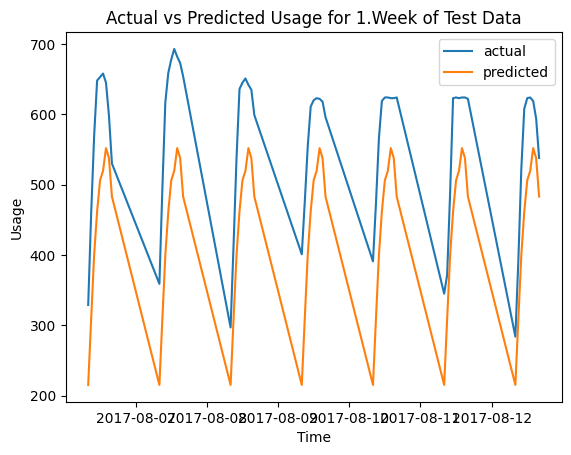

In [112]:
# Plot actual vs predicted values
plt.plot(result_1w['usage'], label='actual')
plt.plot(result_1w['Predicted'], label='predicted')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Usage for 1.Week of Test Data')

plt.show()

In [113]:
# Compare the predictions with the actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    # score = r2_score(actual, pred)
    return print("\nmae:", mae,  "\nrmse:", rmse , "\nmse:",mse,)

In [114]:
eval_metrics(result_1w['usage'] , result_1w['Predicted'])


mae: 123.76530965177139 
rmse: 130.3248582011511 
mse: 16984.568665150142


In [ ]:
# Done

#### Predict 2.Week of Test Data

In [115]:
df_0_train1w_ma = pd.concat([df_0_train_ma , df_0_test_1w_ma])
df_0_train1w_ma

,date,usage
0,2017-06-04 08:00:00,247.0
1,2017-06-04 09:00:00,429.0
2,2017-06-04 10:00:00,534.0
3,2017-06-04 11:00:00,597.0
4,2017-06-04 12:00:00,614.0
...,...,...
58,2017-08-12 12:00:00,623.0
59,2017-08-12 13:00:00,624.0
60,2017-08-12 14:00:00,619.0
61,2017-08-12 15:00:00,594.0


In [116]:
# Fit the model on the training data
model = ExponentialSmoothing(df_0_train1w_ma['usage'], seasonal_periods=9, seasonal='multiplicative')
model_fit = model.fit()

# Use the model to make predictions on the test data
predictions = model_fit.forecast(len(df_0_test_2w_ma))

# Combine the actual and predicted values into a single dataframe
result_2w = pd.concat([df_0_test_2w_ma[['date','usage']].reset_index(drop=True), pd.DataFrame(predictions, columns=['Predicted']).reset_index(drop=True)], axis=1)
result_2w.set_index('date' , drop=True , inplace=True)

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [117]:
result_2w

,usage,Predicted
date,,
2017-08-13 08:00:00,314.0,247.365315
2017-08-13 09:00:00,456.0,349.084531
2017-08-13 10:00:00,551.0,449.842496
2017-08-13 11:00:00,617.0,519.009938
2017-08-13 12:00:00,635.0,563.968805
...,...,...
2017-08-19 12:00:00,1281.0,563.968805
2017-08-19 13:00:00,1283.0,578.119464
2017-08-19 14:00:00,1285.0,610.049913


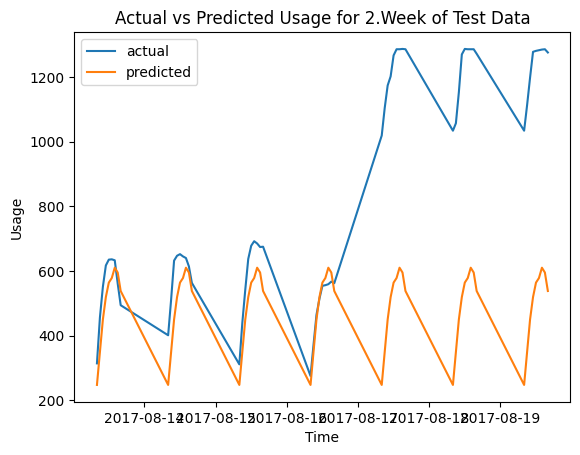

In [118]:
# Plot actual vs predicted values
plt.plot(result_2w['usage'], label='actual')
plt.plot(result_2w['Predicted'], label='predicted')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Usage for 2.Week of Test Data')

plt.show()

In [120]:
eval_metrics(result_2w['usage'] , result_2w['Predicted'])


mae: 350.2820059442276 
rmse: 478.2038600873101 
mse: 228678.93180240362


In [ ]:
# Done

## 2) Prophet Model

### Data Preparation

In [122]:
df_0_train_prop = df_0_train.copy()
df_0_test_prop = df_0_test.copy()
df_0_test_1w_prop = df_0_test_1w.copy()
df_0_test_2w_prop = df_0_test_2w.copy()

In [123]:
df_0_train_prop['ds'] = df_0_train_prop.index
df_0_train_prop = df_0_train_prop.iloc[:,[1,0]]
df_0_train_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_train_prop.reset_index(inplace=True , drop = True)
df_0_train_prop

,ds,y
0,2017-06-04 08:00:00,247.0
1,2017-06-04 09:00:00,429.0
2,2017-06-04 10:00:00,534.0
3,2017-06-04 11:00:00,597.0
4,2017-06-04 12:00:00,614.0
...,...,...
553,2017-08-05 12:00:00,655.0
554,2017-08-05 13:00:00,649.0
555,2017-08-05 14:00:00,622.0
556,2017-08-05 15:00:00,559.0


In [124]:
df_0_test_prop['ds'] = df_0_test_prop.index
df_0_test_prop = df_0_test_prop.iloc[:,[1,0]]
df_0_test_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_prop.reset_index(inplace=True , drop = True)
df_0_test_prop

,ds,y
0,2017-08-06 08:00:00,329.0
1,2017-08-06 09:00:00,459.0
2,2017-08-06 10:00:00,569.0
3,2017-08-06 11:00:00,648.0
4,2017-08-06 12:00:00,653.0
...,...,...
121,2017-08-19 12:00:00,1281.0
122,2017-08-19 13:00:00,1283.0
123,2017-08-19 14:00:00,1285.0
124,2017-08-19 15:00:00,1286.0


In [125]:
df_0_test_1w_prop['ds'] = df_0_test_1w_prop.index
df_0_test_1w_prop = df_0_test_1w_prop.iloc[:,[1,0]]
df_0_test_1w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_1w_prop.reset_index(inplace=True , drop = True)
df_0_test_1w_prop

,ds,y
0,2017-08-06 08:00:00,329.0
1,2017-08-06 09:00:00,459.0
2,2017-08-06 10:00:00,569.0
3,2017-08-06 11:00:00,648.0
4,2017-08-06 12:00:00,653.0
...,...,...
58,2017-08-12 12:00:00,623.0
59,2017-08-12 13:00:00,624.0
60,2017-08-12 14:00:00,619.0
61,2017-08-12 15:00:00,594.0


In [126]:
df_0_test_2w_prop['ds'] = df_0_test_2w_prop.index
df_0_test_2w_prop = df_0_test_2w_prop.iloc[:,[1,0]]
df_0_test_2w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_2w_prop.reset_index(inplace=True , drop = True)
df_0_test_2w_prop

,ds,y
0,2017-08-13 08:00:00,314.0
1,2017-08-13 09:00:00,456.0
2,2017-08-13 10:00:00,551.0
3,2017-08-13 11:00:00,617.0
4,2017-08-13 12:00:00,635.0
...,...,...
58,2017-08-19 12:00:00,1281.0
59,2017-08-19 13:00:00,1283.0
60,2017-08-19 14:00:00,1285.0
61,2017-08-19 15:00:00,1286.0


### Build prophet model

### Predict 1.Week of Test Data

In [127]:
from prophet import Prophet

# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_0_train_prop)

# Make predictions on the test data
forecast_test_1w_prop = model.predict(df_0_test_1w_prop[['ds']])
df_0_test_1w_prop['predictions'] = forecast_test_1w_prop.yhat

Importing plotly failed. Interactive plots will not work.
14:48:44 - cmdstanpy - INFO - Chain [1] start processing
14:48:44 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
df_0_test_1w_prop

,ds,y,predictions
0,2017-08-06 08:00:00,329.0,315.314082
1,2017-08-06 09:00:00,459.0,433.291467
2,2017-08-06 10:00:00,569.0,548.741458
3,2017-08-06 11:00:00,648.0,625.584944
4,2017-08-06 12:00:00,653.0,666.516864
...,...,...,...
58,2017-08-12 12:00:00,623.0,627.104823
59,2017-08-12 13:00:00,624.0,655.759603
60,2017-08-12 14:00:00,619.0,670.412036
61,2017-08-12 15:00:00,594.0,651.465976


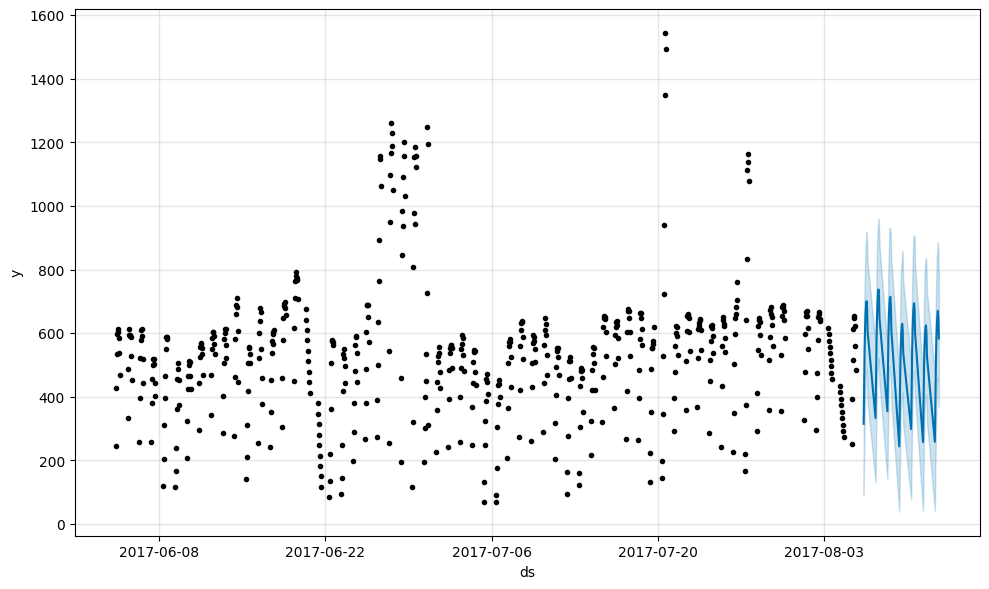

In [130]:
model.plot(forecast_test_1w_prop);
# model.plot_components(forecast_test_1w_prop);

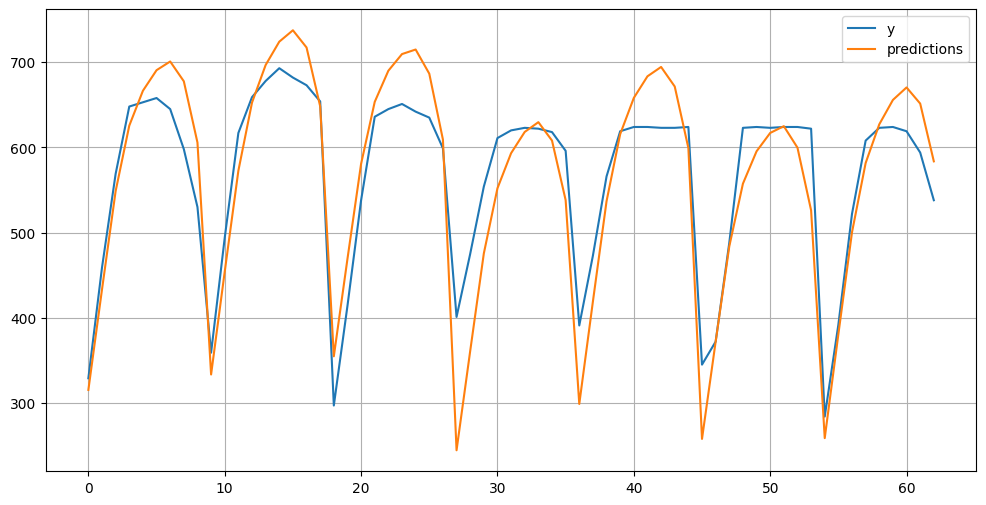

In [132]:
df_0_test_1w_prop.plot(y=['y','predictions'],figsize=(12,6),grid=True);

In [133]:
eval_metrics(df_0_test_1w_prop['y'] , df_0_test_1w_prop['predictions'] )


mae: 40.34973673917049 
rmse: 50.53197998214961 
mse: 2553.481000916369


In [ ]:
# Done

### Build a new prophet model

### Predict the 2.Week of Test Data

In [137]:
df_0_train1w_prop = pd.concat([df_0_train_prop , df_0_test_1w_prop.drop('predictions' , axis=1)])
df_0_train1w_prop

,ds,y
0,2017-06-04 08:00:00,247.0
1,2017-06-04 09:00:00,429.0
2,2017-06-04 10:00:00,534.0
3,2017-06-04 11:00:00,597.0
4,2017-06-04 12:00:00,614.0
...,...,...
58,2017-08-12 12:00:00,623.0
59,2017-08-12 13:00:00,624.0
60,2017-08-12 14:00:00,619.0
61,2017-08-12 15:00:00,594.0


In [138]:
df_0_test_2w_prop.tail(30) # 8-17 , 8-18 , 8-19 is anormal and cant predictable. # Miting filan var heralde :D 

,ds,y
33,2017-08-16 14:00:00,559.0
34,2017-08-16 15:00:00,567.0
35,2017-08-16 16:00:00,562.0
36,2017-08-17 08:00:00,1019.0
37,2017-08-17 09:00:00,1104.0
38,2017-08-17 10:00:00,1174.0
39,2017-08-17 11:00:00,1202.0
40,2017-08-17 12:00:00,1267.0
41,2017-08-17 13:00:00,1286.0
42,2017-08-17 14:00:00,1286.0


In [139]:
# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_0_train1w_prop)

# Make predictions on the test data
forecast_pred_prop = model.predict(df_0_test_2w_prop[['ds']])
df_0_test_2w_prop['predictions'] = forecast_pred_prop.yhat

14:59:04 - cmdstanpy - INFO - Chain [1] start processing
14:59:04 - cmdstanpy - INFO - Chain [1] done processing


In [140]:
df_0_test_2w_prop

,ds,y,predictions
0,2017-08-13 08:00:00,314.0,325.580545
1,2017-08-13 09:00:00,456.0,442.534394
2,2017-08-13 10:00:00,551.0,557.119276
3,2017-08-13 11:00:00,617.0,633.556075
4,2017-08-13 12:00:00,635.0,673.409152
...,...,...,...
58,2017-08-19 12:00:00,1281.0,635.247210
59,2017-08-19 13:00:00,1283.0,660.814230
60,2017-08-19 14:00:00,1285.0,672.716909
61,2017-08-19 15:00:00,1286.0,654.252308


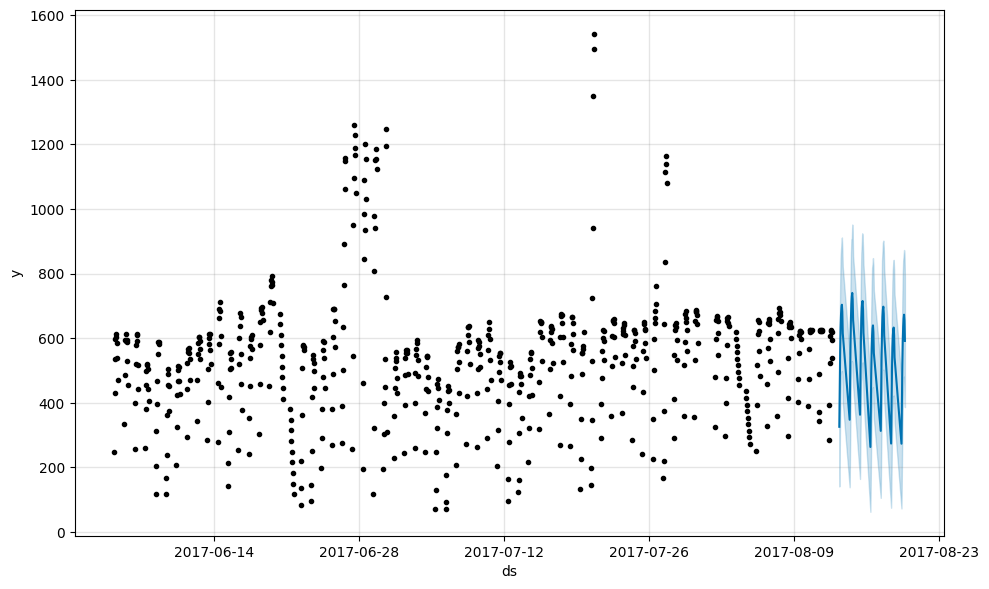

In [141]:
model.plot(forecast_pred_prop);
# model.plot_components(forecast_pred_prop);

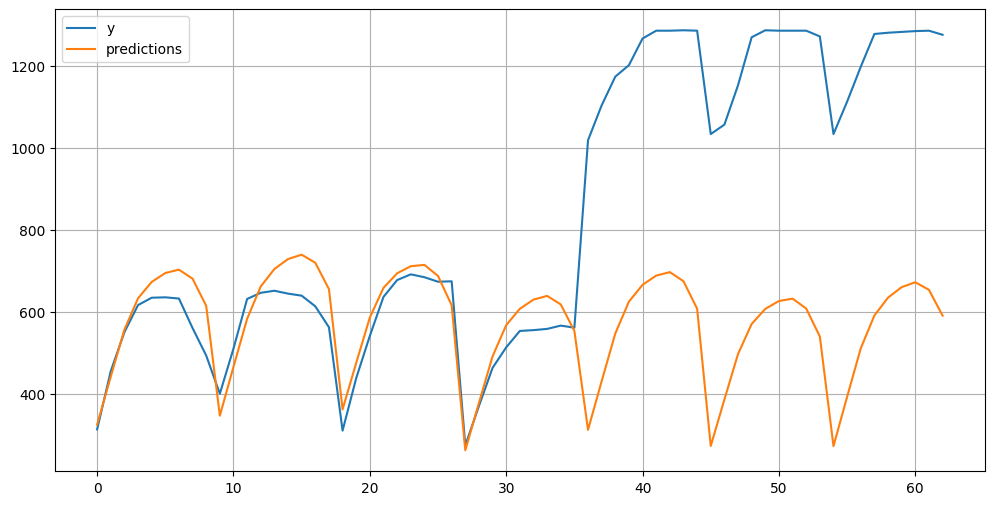

In [144]:
df_0_test_2w_prop.plot(y=['y','predictions'],figsize=(12,6),grid=True);

In [145]:
eval_metrics(df_0_test_2w_prop['y'] , df_0_test_2w_prop['predictions'] )


mae: 311.30338420726645 
rmse: 437.15339371161565 
mse: 191103.08963358283


In [ ]:
# Done

## 3) LSTM

### Data Preparation

In [146]:
df_0_train_lstm = df_0_train.copy()
df_0_test_lstm = df_0_test.copy()
df_0_test_1w_lstm = df_0_test_1w.copy()
df_0_test_2w_lstm = df_0_test_2w.copy()

In [147]:
df_0_train_lstm = df_0_train[:-63]
df_0_valid_lstm = df_0_train[-63:]

### Import Required Libraries For LSTM

In [148]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM , Bidirectional , Dropout , BatchNormalization , Reshape
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

### Train | Test Split

In [149]:
##### ALREADY DONE #####

In [150]:
# test_size = 135

In [151]:
# test_ind = len(df_0_all_train) - test_size

In [152]:
# df_0_train_lstm = df_0_all_train.iloc[:test_ind]
# df_0_test_lstm = df_0_all_train.iloc[test_ind:]

### Scaling

In [153]:
scaler = MinMaxScaler()

In [154]:
df_0_train_lstm_scaled = scaler.fit_transform(df_0_train_lstm)
df_0_valid_lstm_scaled = scaler.fit_transform(df_0_valid_lstm)
df_0_test_lstm_scaled = scaler.transform(df_0_test_lstm)
df_0_test_1w_lstm_scaled = scaler.transform(df_0_test_1w_lstm)
df_0_test_2w_lstm_scaled = scaler.transform(df_0_test_1w_lstm)

### Time Series Generator

In [155]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [157]:
df_0_train_lstm_scaled.shape

(495, 1)

In [158]:
length = 9  # sequences = (data_size - length) / batch_size + 1 
batch_size = 1
train_generator = TimeseriesGenerator(df_0_train_lstm_scaled, df_0_train_lstm_scaled, length = length, batch_size = batch_size)
valid_generator = TimeseriesGenerator(df_0_valid_lstm_scaled, df_0_valid_lstm_scaled, length = length, batch_size = batch_size)
# test_generator = TimeseriesGenerator(df_0_test_lstm_scaled, df_0_test_lstm_scaled, length = length, batch_size = batch_size)

In [159]:
train_generator[0]

(array([[[0.12016293],
         [0.2437203 ],
         [0.31500339],
         [0.35777325],
         [0.36931432],
         [0.36320434],
         [0.34962661],
         [0.31771894],
         [0.27155465]]]),
 array([[0.17990496]]))

In [160]:
X, y = train_generator[0]

In [161]:
X.shape

(1, 9, 1)

In [162]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.12016293 0.2437203  0.31500339 0.35777325 0.36931432 0.36320434
 0.34962661 0.31771894 0.27155465]
Predict this y: 
 [[0.17990496]]


### Building LSTM

In [163]:
from tensorflow.keras.callbacks import EarlyStopping

In [165]:
n_features = df_0_train_lstm_scaled.shape[1]

In [166]:
model = Sequential()

model.add(Bidirectional(LSTM(16, activation = 'relu', return_sequences=True, input_shape = (length, n_features))))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(LSTM(8, activation = 'relu', return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(LSTM(16, activation = 'relu', return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


model.add(Dense(1))


opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)


# from tensorflow.keras.callbacks import ReduceLROnPlateau
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_lr=0.00001)

In [167]:
model.fit(train_generator,
        epochs = 200,
        validation_data = valid_generator,
        # callbacks = [early_stop]
        )

Epoch 1/200
486/486 [==============================] - 7s 8ms/step - loss: 0.0227 - val_loss: 0.1029
Epoch 2/200
486/486 [==============================] - 3s 7ms/step - loss: 0.0182 - val_loss: 0.0653
Epoch 3/200
486/486 [==============================] - 3s 7ms/step - loss: 0.0146 - val_loss: 0.0494
Epoch 4/200
486/486 [==============================] - 3s 7ms/step - loss: 0.0143 - val_loss: 0.0481
Epoch 5/200
486/486 [==============================] - 3s 7ms/step - loss: 0.0150 - val_loss: 0.0695
Epoch 6/200
486/486 [==============================] - 3s 6ms/step - loss: 0.0131 - val_loss: 0.0482
Epoch 7/200
486/486 [==============================] - 3s 7ms/step - loss: 0.0117 - val_loss: 0.0473
Epoch 8/200
486/486 [==============================] - 3s 7ms/step - loss: 0.0136 - val_loss: 0.0676
Epoch 9/200
486/486 [==============================] - 3s 7ms/step - loss: 0.0106 - val_loss: 0.0544
Epoch 10/200
486/486 [==============================] - 3s 6ms/step - loss: 0.0113 - val_lo

In [168]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, None, 32)         2304      
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1312      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 3,625
Trainable params: 3,625
Non-trainable params: 0
_________________________________________________________________


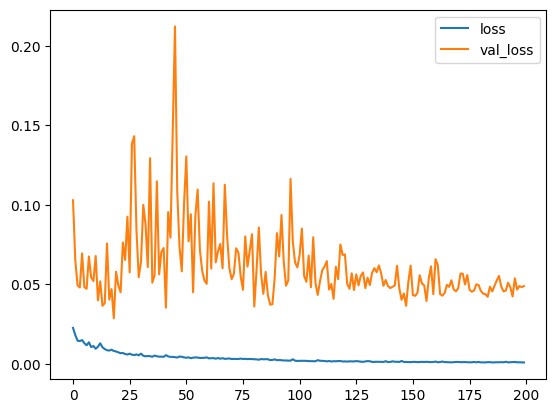

In [169]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Predict the 1.Week of Test Data

In [170]:
predictions_1w_scaled = []

first_eval_batch = df_0_test_1w_lstm_scaled[:length]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_1w_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
# #Alternative
# predictions_1w_scaled = []

# first_eval_batch = df_0_test_1w_lstm_scaled[:length]
# current_batch = first_eval_batch.reshape((1, length, n_features))

# for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
#     # get prediction 1 time step ahead
#     current_pred = model.predict(current_batch)

#     # access the first element of current_pred
#     current_pred = current_pred[0, 0, 0]

#     # store prediction
#     predictions_1w_scaled.append(current_pred)

#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:, 1:, :], [[[current_pred]]], axis=1)

### Inverse Transformation and Comparing

In [171]:
compare_1w = df_0_test_1w_lstm  
compare_1w['Prophet_Predictions'] = np.array(forecast_test_1w_prop.yhat)

predictions = scaler.inverse_transform(predictions_1w_scaled)
compare_1w['LSTM_Predictions_1w_Relu'] = predictions
compare_1w

,usage,Prophet_Predictions,LSTM_Predictions_1w_Relu
2017-08-06 08:00:00,329.0,315.314082,276.758017
2017-08-06 09:00:00,459.0,433.291467,348.778936
2017-08-06 10:00:00,569.0,548.741458,480.593024
2017-08-06 11:00:00,648.0,625.584944,506.275060
2017-08-06 12:00:00,653.0,666.516864,569.990012
...,...,...,...
2017-08-12 12:00:00,623.0,627.104823,580.522355
2017-08-12 13:00:00,624.0,655.759603,511.576952
2017-08-12 14:00:00,619.0,670.412036,590.335412
2017-08-12 15:00:00,594.0,651.465976,563.891600


In [ ]:
# #Alternative
# compare_1w = df_0_test_1w_lstm  
# compare_1w['Prophet_Predictions'] = np.array(forecast_test_1w_prop.yhat)

# predictions = scaler.inverse_transform(np.array(predictions_1w_scaled).reshape(-1,1))
# compare_1w['LSTM_Predictions_1w_Relu'] = predictions
# compare_1w

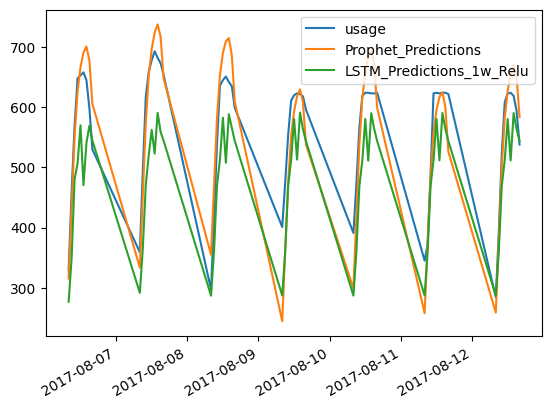

In [172]:
compare_1w.plot();

In [174]:
eval_metrics(compare_1w.usage, compare_1w.LSTM_Predictions_1w_Relu) # I'll try it with more epochs.


mae: 77.96773890843467 
rmse: 88.75782401151137 
mse: 7877.951323258425


# Municipality 1 test scores

## 1) Moving Average Model

### Prepara data for moving average model

In [ ]:
df_1_train_ma = df_1_train.copy()
df_1_test_ma = df_1_test.copy()
df_1_test_1w_ma = df_1_test_1w.copy()
df_1_test_2w_ma = df_1_test_2w.copy()

In [ ]:
df_1_train_ma['date'] = df_1_train_ma.index
df_1_train_ma = df_1_train_ma.iloc[:,[1,0]]
df_1_train_ma.reset_index(drop=True , inplace=True)

df_1_test_ma['date'] = df_1_test_ma.index
df_1_test_ma = df_1_test_ma.iloc[:,[1,0]]
df_1_test_ma.reset_index(drop=True , inplace=True)

df_1_test_1w_ma['date'] = df_1_test_1w_ma.index
df_1_test_1w_ma = df_1_test_1w_ma.iloc[:,[1,0]]
df_1_test_1w_ma.reset_index(drop=True , inplace=True)

df_1_test_2w_ma['date'] = df_1_test_2w_ma.index
df_1_test_2w_ma = df_1_test_2w_ma.iloc[:,[1,0]]
df_1_test_2w_ma.reset_index(drop=True , inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df_1_train_ma.usage)
   
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}')   # stationary 

In [ ]:
# usages_diff = np.diff(df_0_train_ma.usage, n=1)

# ADF_result = adfuller(usages_diff)

# print(f'ADF Statistic: {ADF_result[0]}') 
# print(f'p-value: {ADF_result[1]}')   # now stationary 

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf

# plot_acf(df_0_train_ma.usage, lags=30);
# plt.tight_layout()

### Build a Moving Average Model

### Predict 1.Week of Test Data

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model on the training data
model = ExponentialSmoothing(df_1_train_ma['usage'], seasonal_periods=9, seasonal='multiplicative')
model_fit = model.fit()

# Use the model to make predictions on the test data
predictions_train = model_fit.forecast(len(df_1_train_ma))
predictions = model_fit.forecast(len(df_1_test_1w_ma))

# Combine the actual and predicted values into a single dataframe
result_1w = pd.concat([df_1_test_1w_ma[['date','usage']].reset_index(drop=True), pd.DataFrame(predictions, columns=['Predicted']).reset_index(drop=True)], axis=1)
result_1w.set_index('date' , drop=True , inplace=True)

In [ ]:
result_1w

In [ ]:
# Plot actual vs predicted values
plt.plot(result_1w['usage'], label='actual')
plt.plot(result_1w['Predicted'], label='predicted')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Usage for 1.Week of Test Data')

plt.show()

In [ ]:
# Compare the predictions with the actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    # score = r2_score(actual, pred)
    return print("\nmae:", mae,  "\nrmse:", rmse , "\nmse:",mse,)

In [ ]:
eval_metrics(result_1w['usage'] , result_1w['Predicted'])

In [ ]:
# Done

### Build a new Moving Average Model

### Predict 2.Week of Test Data

In [ ]:
df_1_train1w_ma = pd.concat([df_1_train_ma , df_1_test_1w_ma])
df_1_train1w_ma

In [ ]:
# Fit the model on the training data
model = ExponentialSmoothing(df_1_train1w_ma['usage'], seasonal_periods=9, seasonal='multiplicative')
model_fit = model.fit()

# Use the model to make predictions on the test data
predictions = model_fit.forecast(len(df_1_test_2w_ma))

# Combine the actual and predicted values into a single dataframe
result_2w = pd.concat([df_1_test_2w_ma[['date','usage']].reset_index(drop=True), pd.DataFrame(predictions, columns=['Predicted']).reset_index(drop=True)], axis=1)
result_2w.set_index('date' , drop=True , inplace=True)

In [ ]:
result_2w

In [ ]:
# Plot actual vs predicted values
plt.plot(result_2w['usage'], label='actual')
plt.plot(result_2w['Predicted'], label='predicted')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Usage for 2.Week of Test Data')

plt.show()

In [ ]:
eval_metrics(result_2w['usage'] , result_2w['Predicted'])

In [ ]:
# Done

## 2) Prophet Model

### Prepare data for prophet model

In [ ]:
df_0_train_prop = df_0_train.copy()
df_0_test_prop = df_0_test.copy()
df_0_test_1w_prop = df_0_test_1w.copy()
df_0_test_2w_prop = df_0_test_2w.copy()

In [ ]:
df_1_train_prop = df_1_train.copy()
df_1_test_prop = df_1_test.copy()
df_1_test_1w_prop = df_1_test_1w.copy()
df_1_test_2w_prop = df_1_test_2w.copy()

In [ ]:
df_0_train_prop['ds'] = df_0_train_prop.index
df_0_train_prop = df_0_train_prop.iloc[:,[1,0]]
df_0_train_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_train_prop.reset_index(inplace=True , drop = True)
df_0_train_prop

In [ ]:
df_1_train_prop['ds'] = df_1_train_prop.index
df_1_train_prop = df_1_train_prop.iloc[:,[1,0]]
df_1_train_prop.rename(columns = {'usage':'y'} , inplace=True)
df_1_train_prop.reset_index(inplace=True , drop = True)
df_1_train_prop

In [ ]:
df_0_test_prop['ds'] = df_0_test_prop.index
df_0_test_prop = df_0_test_prop.iloc[:,[1,0]]
df_0_test_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_prop.reset_index(inplace=True , drop = True)
df_0_test_prop

In [ ]:
df_1_test_prop['ds'] = df_1_test_prop.index
df_1_test_prop = df_1_test_prop.iloc[:,[1,0]]
df_1_test_prop.rename(columns = {'usage':'y'} , inplace=True)
df_1_test_prop.reset_index(inplace=True , drop = True)
df_1_test_prop

In [ ]:
df_0_test_1w_prop['ds'] = df_0_test_1w_prop.index
df_0_test_1w_prop = df_0_test_1w_prop.iloc[:,[1,0]]
df_0_test_1w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_1w_prop.reset_index(inplace=True , drop = True)
df_0_test_1w_prop

In [ ]:
df_1_test_1w_prop['ds'] = df_1_test_1w_prop.index
df_1_test_1w_prop = df_1_test_1w_prop.iloc[:,[1,0]]
df_1_test_1w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_1_test_1w_prop.reset_index(inplace=True , drop = True)
df_1_test_1w_prop

In [ ]:
df_0_test_2w_prop['ds'] = df_0_test_2w_prop.index
df_0_test_2w_prop = df_0_test_2w_prop.iloc[:,[1,0]]
df_0_test_2w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_2w_prop.reset_index(inplace=True , drop = True)
df_0_test_2w_prop

In [ ]:
df_1_test_2w_prop['ds'] = df_1_test_2w_prop.index
df_1_test_2w_prop = df_1_test_2w_prop.iloc[:,[1,0]]
df_1_test_2w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_1_test_2w_prop.reset_index(inplace=True , drop = True)
df_1_test_2w_prop

### Build prophet model

### Predict 1.Week of Test Data

In [ ]:
from prophet import Prophet

# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_1_train_prop)

# Make predictions on the test data
forecast_1_test_1w_prop = model.predict(df_1_test_1w_prop[['ds']])
df_1_test_1w_prop['predictions'] = forecast_1_test_1w_prop.yhat

In [ ]:
# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_1_train_prop)

# Make predictions on the test data
forecast_0_test_1w_prop = model.predict(df_0_test_1w_prop[['ds']])
df_0_test_1w_prop['predictions'] = forecast_0_test_1w_prop.yhat

In [ ]:
# forecast_test[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
df_0_test_1w_prop

In [ ]:
df_1_test_1w_prop

In [ ]:
model.plot(forecast_0_test_1w_prop);
# model.plot_components(forecast_test_1w_prop);

In [ ]:
model.plot(forecast_1_test_1w_prop);
# model.plot_components(forecast_test_1w_prop);

In [ ]:
df_0_test_1w_prop.plot(y=['y','predictions'],figsize=(12,6),grid=True);

In [ ]:
# # Compare the predictions with the actual values
# from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

# def eval_metrics(actual, pred):
#     rmse = np.sqrt(mean_squared_error(actual, pred))
#     mae = mean_absolute_error(actual, pred)
#     mse = mean_squared_error(actual, pred)
#     score = r2_score(actual, pred)
#     return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
eval_metrics(df_0_test_1w_prop['y'] , df_0_test_1w_prop['predictions'] )

In [ ]:
eval_metrics(df_1_test_1w_prop['y'] , df_1_test_1w_prop['predictions'] )

### Build a new prophet model

### Predict the 2.Week of Test Data

In [ ]:
df_1_train1w_prop = pd.concat([df_1_train_prop , df_1_test_1w_prop.drop('predictions' , axis=1)])
df_1_train1w_prop

In [ ]:
df_1_test_2w_prop.tail(30) # 8-17 , 8-18 , 8-19 is anormal and cant predictable. # Miting filan var heralde :D 

In [ ]:
# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_1_train1w_prop)

# Make predictions on the test data
forecast_pred_prop = model.predict(df_1_test_2w_prop[['ds']])
df_1_test_2w_prop['predictions'] = forecast_pred_prop.yhat

In [ ]:
df_1_test_2w_prop

In [ ]:
model.plot(forecast_pred_prop);
# model.plot_components(forecast_pred_prop);

In [ ]:
eval_metrics(df_1_test_2w_prop['y'] , df_1_test_2w_prop['predictions'] )

In [ ]:
# Done

## 3) LSTM model

### Prepare the data

In [ ]:
# df_0_train

In [ ]:
# df_0_train_lstm = df_0_train.copy()
# df_0_test_lstm = df_0_test.copy()
# df_0_test_1w_lstm = df_0_test_1w.copy()
# df_0_test_2w_lstm = df_0_test_2w.copy()

In [ ]:
df_1_train_lstm = df_1_train.copy()
df_1_test_lstm = df_1_test.copy()
df_1_test_1w_lstm = df_1_test_1w.copy()
df_1_test_2w_lstm = df_1_test_2w.copy()

In [ ]:
# df_0_train_lstm = df_0_train[:-63]
# df_0_valid_lstm = df_0_train[-63:]

In [ ]:
df_1_train_lstm = df_1_train[:-63]
df_1_valid_lstm = df_1_train[-63:]

In [ ]:
# df_0_train_lstm

### Import Required Libraries for LSTM Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM , Bidirectional , Dropout , BatchNormalization , Reshape
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

### Train | Test Split

In [ ]:
##### ALREADY DONE #####

In [ ]:
# test_size = 135

In [ ]:
# test_ind = len(df_0_all_train) - test_size

In [ ]:
# df_0_train_lstm = df_0_all_train.iloc[:test_ind]
# df_0_test_lstm = df_0_all_train.iloc[test_ind:]

### Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# df_0_train_lstm_scaled = scaler.fit_transform(df_0_train_lstm)
# df_0_valid_lstm_scaled = scaler.fit_transform(df_0_valid_lstm)
# df_0_test_lstm_scaled = scaler.transform(df_0_test_lstm)
# df_0_test_1w_lstm_scaled = scaler.transform(df_0_test_1w_lstm)
# df_0_test_2w_lstm_scaled = scaler.transform(df_0_test_1w_lstm)

In [ ]:
df_1_train_lstm_scaled = scaler.fit_transform(df_1_train_lstm)
df_1_valid_lstm_scaled = scaler.fit_transform(df_1_valid_lstm)
df_1_test_lstm_scaled = scaler.transform(df_1_test_lstm)
df_1_test_1w_lstm_scaled = scaler.transform(df_1_test_1w_lstm)
df_1_test_2w_lstm_scaled = scaler.transform(df_1_test_1w_lstm)

### Time Series Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
df_1_train_lstm_scaled.shape

In [ ]:
# length = 9  # sequences = (data_size - length) / batch_size + 1 # (558 - 9) / 1 + 1 = 550
# batch_size = 1
# train_generator = TimeseriesGenerator(df_0_train_lstm_scaled, df_0_train_lstm_scaled, length = length, batch_size = batch_size)
# valid_generator = TimeseriesGenerator(df_0_valid_lstm_scaled, df_0_valid_lstm_scaled, length = length, batch_size = batch_size)
# # test_generator = TimeseriesGenerator(df_0_test_lstm_scaled, df_0_test_lstm_scaled, length = length, batch_size = batch_size)

In [ ]:
length = 9  # sequences = (data_size - length) / batch_size + 1 # (558 - 9) / 1 + 1 = 550
batch_size = 1
train_generator = TimeseriesGenerator(df_1_train_lstm_scaled, df_1_train_lstm_scaled, length = length, batch_size = batch_size)
valid_generator = TimeseriesGenerator(df_1_valid_lstm_scaled, df_1_valid_lstm_scaled, length = length, batch_size = batch_size)
# test_generator = TimeseriesGenerator(df_0_test_lstm_scaled, df_0_test_lstm_scaled, length = length, batch_size = batch_size)

In [ ]:
train_generator[0]

In [ ]:
X, y = train_generator[0]

In [ ]:
X.shape

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

In [ ]:
train_generator[0]

### Model and Performance

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features = df_1_train_lstm_scaled.shape[1]

### with 'relu' activation func

In [ ]:
model = Sequential()

model.add(LSTM(16, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
# model.add(Dropout(0.2))
model.add(LSTM(8, activation = 'relu', return_sequences=False))
# model.add(Dropout(0.2))
# model.add(LSTM(16, activation = 'relu', return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


model.add(Dense(1))


opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# model = Sequential()

# model.add(Reshape((length, n_features), input_shape=(length, 1, n_features)))
# model.add(Bidirectional(LSTM(64, activation = 'relu', return_sequences=True)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(LSTM(32, activation = 'relu', return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(LSTM(16, activation = 'relu', return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(1))


# opt = Adam(learning_rate=0.001)
# model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# model = Sequential()

# model.add(Bidirectional(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (1, length, n_features))))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(LSTM(32, activation = 'relu', return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(LSTM(16, activation = 'relu', return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# model.add(Dense(1))


# opt = Adam(learning_rate=0.001)
# model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

In [ ]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_lr=0.00001)

# # model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr])

In [ ]:
model.fit(train_generator,
        epochs = 60,
        validation_data = valid_generator,
        # callbacks = [early_stop]
        )

In [ ]:
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

### Predict the 1.Week of Test Data

In [ ]:
# for_range = df_0_test_1w_lstm_scaled.shape[0]
# first_eval_batch = df_0_test_1w_lstm_scaled[:length] # First length num
# # first_eval_batch2 = df_0_test_1w_lstm_scaled[-length:] # Last length num
# current_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
# first_eval_batch

In [ ]:
# first_eval_batch2

In [ ]:
# current_batch

In [ ]:
# current_batch.shape

In [ ]:
# current_pred = model.predict(current_batch)
# current_pred

In [ ]:
# current_pred.shape

In [ ]:
# current_pred[0]

In [ ]:
# current_batch[:, 1:, :].shape

In [ ]:
# [current_pred].reshape()

In [ ]:
# #Alternative
# predictions_1w_scaled = []

# first_eval_batch = df_1_test_1w_lstm_scaled[:length]
# current_batch = first_eval_batch.reshape((1, length, n_features))

# for i in range(df_1_test_1w_lstm_scaled.shape[0]):
    
#     # get prediction 1 time step ahead
#     current_pred = model.predict(current_batch)

#     # access the first element of current_pred
#     current_pred = current_pred[0, 0, 0]

#     # store prediction
#     predictions_1w_scaled.append(current_pred)

#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:, 1:, :], [[[current_pred]]], axis=1)

In [ ]:
predictions_1w_scaled = []

first_eval_batch = df_1_test_1w_lstm_scaled[:length]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(df_1_test_1w_lstm_scaled.shape[0]):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_1w_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

### Inverse Transformation and Comparing

In [ ]:
# #Alternative
# compare_1w = df_0_test_1w_lstm  
# compare_1w['Prophet_Predictions'] = np.array(forecast_test_1w_prop.yhat)

# predictions = scaler.inverse_transform(np.array(predictions_1w_scaled).reshape(-1,1))
# compare_1w['LSTM_Predictions_1w_Relu'] = predictions
# compare_1w

In [ ]:
compare_1w = df_1_test_1w_lstm  
compare_1w['Prophet_Predictions'] = np.array(forecast_1_test_1w_prop.yhat)

predictions = scaler.inverse_transform(predictions_1w_scaled)
compare_1w['LSTM_Predictions_1w_Relu'] = predictions
compare_1w

In [ ]:
compare_1w.plot();

In [ ]:
eval_metrics(compare_1w.usage, compare_1w.Prophet_Predictions)

In [ ]:
eval_metrics(compare_1w.usage, compare_1w.LSTM_Predictions_1w_Relu) # I'll try it with more epochs.

### With Tanh activation func.

In [ ]:
# model = Sequential()

# model.add(Bidirectional(LSTM(units=50, activation='tanh' ,return_sequences=True, input_shape=(length, n_features))))
# model.add(Dropout(0.3))

# model.add(LSTM(units=50, activation='tanh' , return_sequences=False))
# model.add(Dropout(0.5))

# model.add(Dense(1))

# opt = Adam(learning_rate=0.001)
# model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

In [ ]:
# model.fit(train_generator,
#         epochs = 400,
#         validation_data = valid_generator,
#         # callbacks = [early_stop]
#         )

In [ ]:
# model.summary()

In [ ]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.plot();

### Evaluation on Test Data

In [ ]:
# predictions_1w_scaled = []

# first_eval_batch = df_0_test_1w_lstm_scaled[:length]
# current_batch = first_eval_batch.reshape((1, length, n_features))

# for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
#     # get prediction 1 time stamp ahead
#     current_pred = model.predict(current_batch)
    
#     # store prediction
#     predictions_1w_scaled.append(current_pred[0]) 
    
#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:, 1:, :], current_pred, axis=1)

### Inverse Transformation and Comparing

In [ ]:
# predictions = scaler.inverse_transform(np.array(predictions_1w_scaled))

In [ ]:
# predictions = scaler.inverse_transform(predictions_1w_scaled)
# compare_1w['LSTM_Predictions_1w_Relu'] = predictions
# compare_1w

In [ ]:
# compare_1w.plot();

In [ ]:
# eval_metrics(compare_1w.usage, compare_1w.LSTM_Predictions_Tanh)

In [ ]:
# Done

### with 'sigmoid' activation func

In [ ]:
# model = Sequential()

# model.add(Bidirectional(LSTM(units=50, activation = 'sigmoid' ,  return_sequences=True, input_shape=(length, n_features))))
# model.add(Dropout(0.3))

# model.add(LSTM(units=50, activation = 'sigmoid' , return_sequences=False))
# model.add(Dropout(0.5))

# model.add(Dense(1))

# opt = Adam(learning_rate=0.001)
# model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [ ]:
# model.fit(train_generator,
#         epochs = 400,
#         validation_data = valid_generator,
#         # callbacks = [early_stop]
#         )

In [ ]:
# model.summary()

In [ ]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.plot();

### Evaluation on Test Data

In [ ]:
# predictions_1w_scaled = []

# first_eval_batch = df_0_test_1w_lstm_scaled[:length]
# current_batch = first_eval_batch.reshape((1, length, n_features))

# for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
#     # get prediction 1 time stamp ahead
#     current_pred = model.predict(current_batch)
    
#     # store prediction
#     predictions_1w_scaled.append(current_pred[0]) 
    
#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:, 1:, :], current_pred, axis=1)

### Inverse Transformation and Comparing

In [ ]:
# predictions = scaler.inverse_transform(predictions_1w_scaled)
# compare_1w['LSTM_Predictions_Sigmoid'] = predictions
# compare_1w

In [ ]:
# compare_1w.plot();

In [ ]:
# eval_metrics(compare_1w.usage, compare_1w.LSTM_Predictions_Sigmoid)

## Create a new final model

### Predict all municipalities bus usages next 1 week

### Prepare the data for Prophet model

In [ ]:
df_0_last = df_0
df_1_last = df_1
df_2_last = df_2
df_3_last = df_3
df_4_last = df_4
df_5_last = df_5
df_6_last = df_6
df_7_last = df_7
df_8_last = df_8
df_9_last = df_9

In [ ]:
df_0_last

In [ ]:
dfs = [df_0_last,df_1_last,df_2_last,df_3_last,df_4_last,df_5_last,df_6_last,df_7_last,df_8_last,df_9_last]

In [ ]:
dates = pd.date_range(start='2017-08-20 08:00:00', end='2017-08-26 16:00:00', freq='H')
df = pd.DataFrame(dates, columns=['ds'])
df['day'] = df['ds'].dt.date

# Filter the hours between 08:00:00 and 16:00:00
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour <= 16)]

grouped = df.groupby(df['day'])
time_series_list = [grouped.get_group(x) for x in grouped.groups]
df_pred = pd.DataFrame(pd.concat(time_series_list)).drop('day' , axis = 1)
df_pred['y'] = np.nan
print(df_pred)

# for i, time_series in enumerate(time_series_list):
#     print(f"Time series {i+1}:")
#     print(time_series)


### Build a model for each municipality and visualize

In [ ]:
def model_visualizer(num):
    exec(f"print('Municipality {num}')")
    print('------------------------')
    exec(f"print(forecast_pred_{num})")
    exec(f"model.plot(visual_pred_{num} , xlabel = '''Municipality {num} \nDate''' , ylabel = '''Municipality {num} \nBus Usage''' )")
    # exec(f"forecast_pred_{i}.plot(y=['yhat'],figsize=(12,6),grid=True)")
    print('------------------------')

In [ ]:
i = 0
for df in dfs:
    df['ds'] = df.index
    df = df.iloc[:,[1,0]]
    df.rename(columns = {'usage':'y'} , inplace=True)
    df.reset_index(inplace=True , drop = True)
    # Create a new Prophet model
    model = Prophet()

    # Fit the model to the training data
    model.fit(df)

    # Make predictions on the test data
    exec(f"visual_pred_{i} = model.predict(df_pred[['ds']])")
    exec(f"forecast_pred_{i} = model.predict(df_pred[['ds']]).yhat")
    exec(f"df_pred_{i} = (pd.DataFrame(list(forecast_pred_{i}) , columns=['Predicts'] ,  index = df_pred.ds)).reset_index()")
    
    model_visualizer(i)
    
    i += 1


In [ ]:
# Done

# Problems I've found so far

In [ ]:
# 1) Either the total_capacity of the municipality with id number 1 was entered incorrectly or the usage information of 229 data was entered incorrectly.(
# 1.Option --> Since there is not a big difference, we can assume that a few buses are rented by that municipality. 
# 2.Option --> Or we can think that the buses are counted incorrectly and it will be impossible to exceed the total capacity, and we can equal the ones that exceed the capacity to the upper limit.)


# 2) The time of 2 data was entered incorrectly (Solved correct data entered)
# 3) dtype of timestap feature was object (Solved dtype changed)
# 4) There is quite a bit of data and measurements for 7 o'clock. There is so little data, probably because the buses starts just towards those hours. (Solved +5 minutes and 10 seconds added.)


# 5) While 180 measurements were required, 170 measurements were made at 5 days. (Counting was made 1 time, not 2 times, at the 8th hour of those who were 170) (180 or 170, it doesn't matter)

# 6) On 30 June, 340 measurements were made while it should have been 180. There are datas where 2 measurements are made at intervals of a few seconds. 
# (One of the measurements made at the same minute is deleted. Second measurements are kept)

# 7) We have 18 nan days to handle. (Total 162 hours)
